In [1]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error

In [2]:
files = []
for dirname, _, filenames in os.walk('/kaggle/input/playground-series-s4e4'):
    for filename in filenames:
        print(filename)
        files.append(pd.read_csv(os.path.join(dirname,filename)))

sample_submission.csv
train.csv
test.csv


In [3]:
df_train = files[1]
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [4]:
df_test = files[2]
df_test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [5]:
df_test2 = df_test.drop(["id"], axis = 1)
df_test2.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [6]:
sub = files[0]
sub.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10


In [7]:
df_train.shape

(90615, 10)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [9]:
df_train["Sex"].value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

In [10]:
df_train.isnull().sum()/len(df_train)*100

id                0.0
Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Whole weight.1    0.0
Whole weight.2    0.0
Shell weight      0.0
Rings             0.0
dtype: float64

In [11]:
df_train.duplicated().sum()

0

In [12]:
cols = df_train.select_dtypes(include = "number").columns
cols

Index(['id', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [13]:
"""for i in cols:
    sns.histplot(data = df_train, x = i, color = "red")
    plt.show()
"""

'for i in cols:\n    sns.histplot(data = df_train, x = i, color = "red")\n    plt.show()\n'

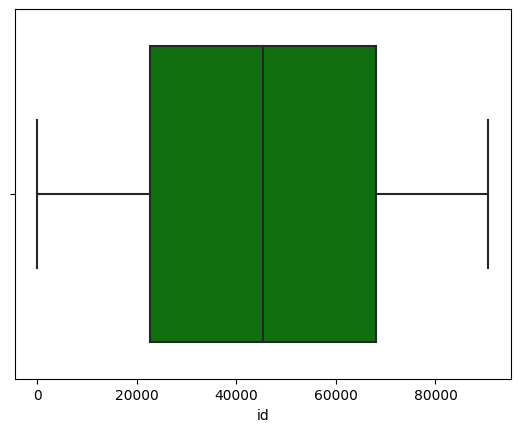

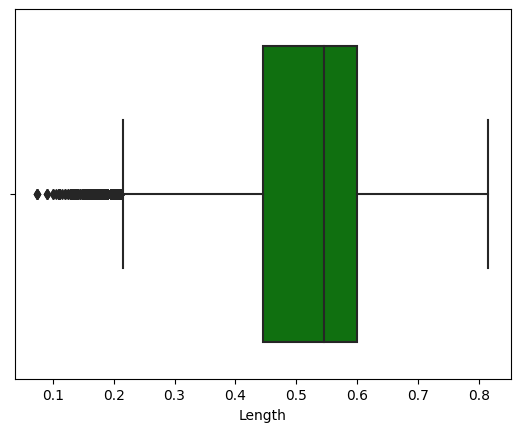

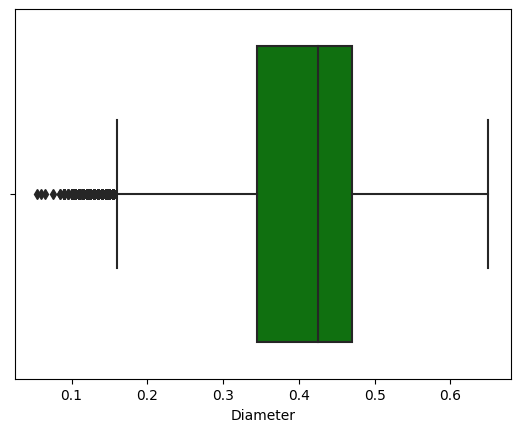

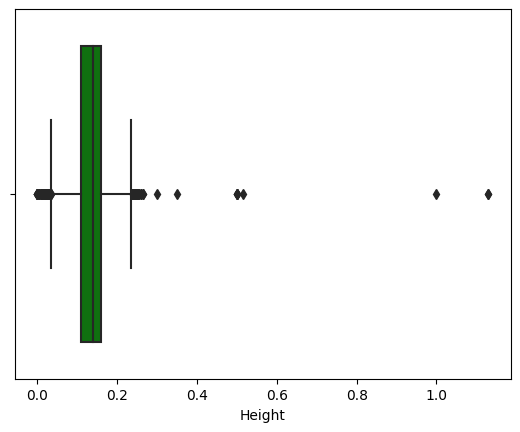

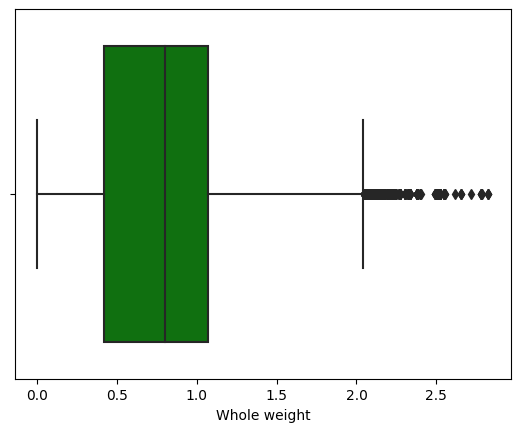

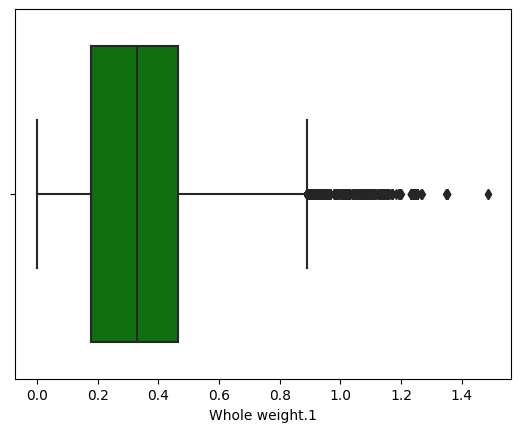

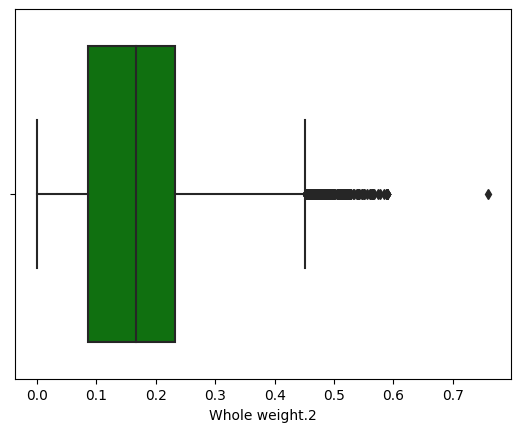

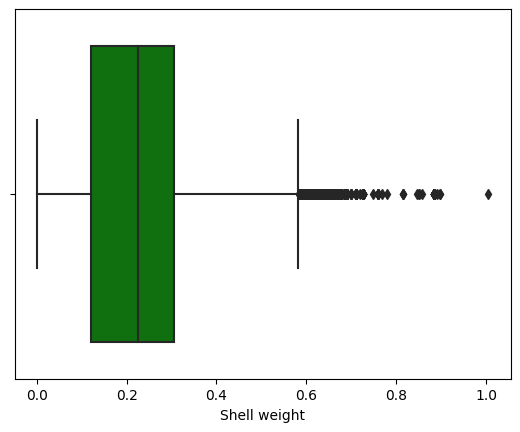

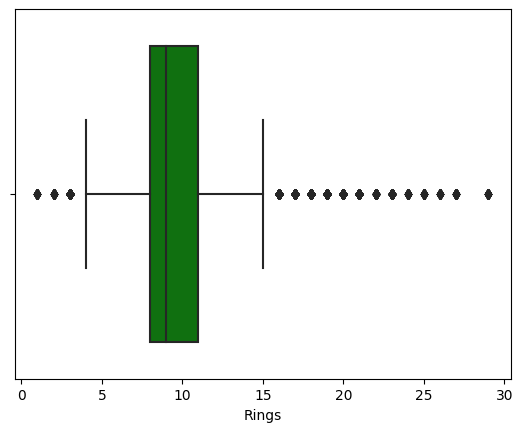

In [14]:
for i in cols:
    sns.boxplot(data = df_train, x = i, color = "green")
    plt.show()

Treatment

In [15]:
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - (1.5)*iqr
    uw = q3 + (1.5)*iqr
    return lw, uw

In [16]:
for i in cols:
    lw, uw = wisker(df_train[i])
    df_train[i] = np.where(df_train[i] < lw , lw, df_train[i])
    df_train[i] = np.where(df_train[i] > uw , uw, df_train[i])

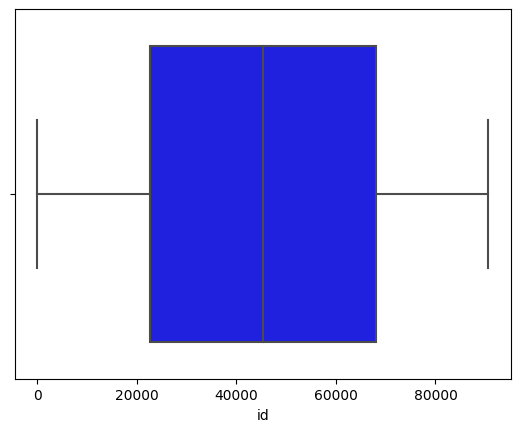

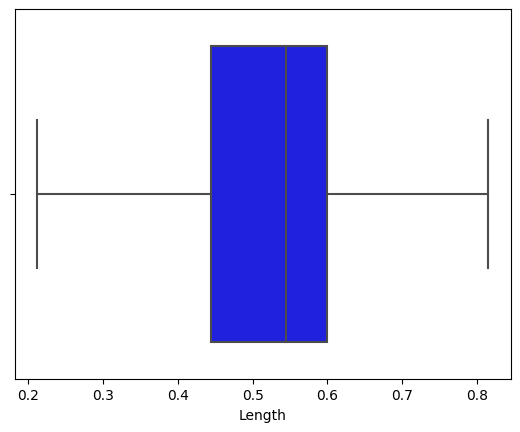

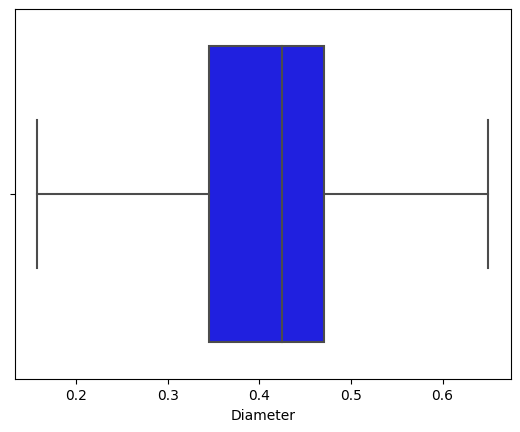

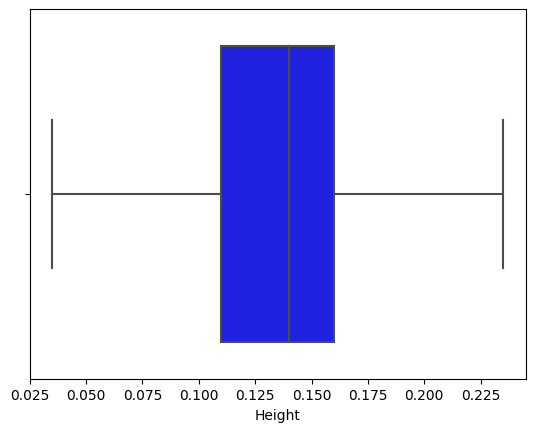

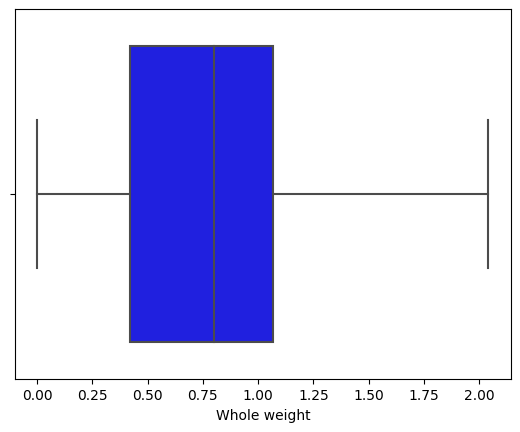

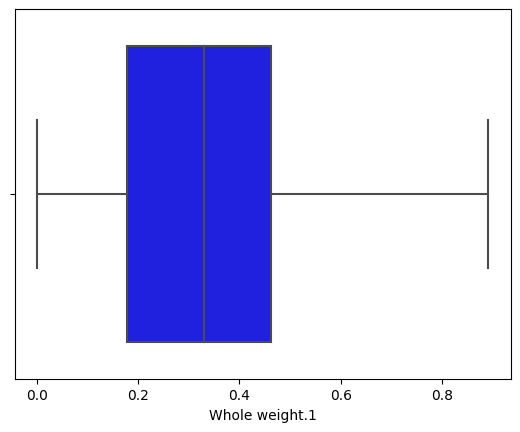

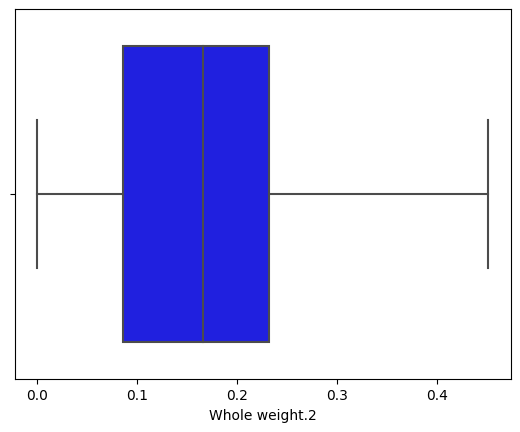

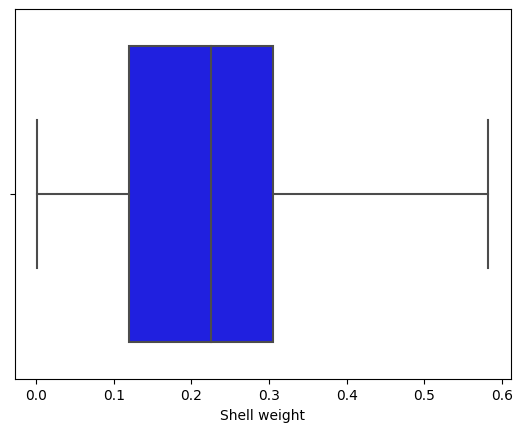

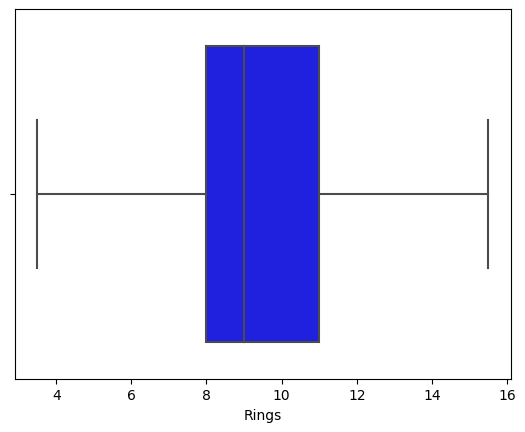

In [17]:
for i in cols:
    sns.boxplot(data = df_train, x = i, color = "blue")
    plt.show()

TREATMENT

In [18]:
X = df_train.drop(["id", "Rings"], axis = 1)
X

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,F,0.5500,0.4300,0.150,0.7715,0.3285,0.1465,0.2400
1,F,0.6300,0.4900,0.145,1.1300,0.4580,0.2765,0.3200
2,I,0.2125,0.1575,0.035,0.0210,0.0055,0.0030,0.0050
3,M,0.5950,0.4750,0.150,0.9145,0.3755,0.2055,0.2500
4,I,0.5550,0.4250,0.130,0.7820,0.3695,0.1600,0.1975
...,...,...,...,...,...,...,...,...
90610,M,0.3350,0.2350,0.075,0.1585,0.0685,0.0370,0.0450
90611,M,0.5550,0.4250,0.150,0.8790,0.3865,0.1815,0.2400
90612,I,0.4350,0.3300,0.095,0.3215,0.1510,0.0785,0.0815
90613,I,0.3450,0.2700,0.075,0.2000,0.0980,0.0490,0.0700


In [19]:
y = df_train["Rings"]
y

0        11.0
1        11.0
2         6.0
3        10.0
4         9.0
         ... 
90610     6.0
90611     9.0
90612     6.0
90613     6.0
90614     8.0
Name: Rings, Length: 90615, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72492, 8), (18123, 8), (72492,), (18123,))

In [21]:
X_train.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
1211,F,0.545,0.425,0.135,0.8360,0.3345,0.1715,0.250
37517,I,0.475,0.375,0.110,0.5155,0.2420,0.1170,0.135
63248,I,0.280,0.215,0.090,0.0990,0.0380,0.0235,0.030
55075,F,0.495,0.385,0.120,0.6905,0.3125,0.1655,0.161
50,I,0.470,0.375,0.120,0.5395,0.2595,0.1165,0.160


In [22]:
y_train.head()

1211     10.0
37517     8.0
63248     5.0
55075     9.0
50        9.0
Name: Rings, dtype: float64

In [23]:
train_num = X_train.drop(["Sex"], axis = 1)
train_num.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
1211,0.545,0.425,0.135,0.8360,0.3345,0.1715,0.250
37517,0.475,0.375,0.110,0.5155,0.2420,0.1170,0.135
63248,0.280,0.215,0.090,0.0990,0.0380,0.0235,0.030
55075,0.495,0.385,0.120,0.6905,0.3125,0.1655,0.161
50,0.470,0.375,0.120,0.5395,0.2595,0.1165,0.160


In [24]:
train_cat = X_train["Sex"].copy()
train_cat.head()

1211     F
37517    I
63248    I
55075    F
50       I
Name: Sex, dtype: object

In [25]:
X_test.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
6187,I,0.420,0.325,0.110,0.3535,0.1480,0.0745,0.1150
40645,F,0.570,0.475,0.125,0.9395,0.4275,0.2150,0.2700
50361,F,0.570,0.450,0.140,0.8685,0.3275,0.1905,0.2550
68708,I,0.425,0.310,0.100,0.2645,0.0925,0.0575,0.0715
20763,I,0.380,0.275,0.085,0.2280,0.1075,0.0595,0.0735


In [26]:
y_test.head()

6187      7.0
40645     9.0
50361    12.0
68708     7.0
20763     6.0
Name: Rings, dtype: float64

In [27]:
y_test.shape

(18123,)

Pipeline

In [28]:
num_pipeline = Pipeline([("scaler", StandardScaler())])

In [29]:
cat_pipeline = Pipeline([("encoder", OneHotEncoder())])

In [30]:
num_attribs = list(train_num)
num_attribs

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Whole weight.1',
 'Whole weight.2',
 'Shell weight']

In [31]:
cat_attribs = ["Sex"]
cat_attribs

['Sex']

In [32]:
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", cat_pipeline, cat_attribs)])

In [33]:
test_f= full_pipeline.fit_transform(df_test2)
test_f

array([[ 1.08472313,  0.74935358,  0.50423579, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.53203837,  0.59545832,  0.63521348, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.36198152,  0.18507096,  0.11130274, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.6170668 ,  0.39026464,  0.50423579, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.21226577,  1.26233779,  1.42107959, ...,  1.        ,
         0.        ,  0.        ],
       [-0.74338801, -0.63570377, -0.412608  , ...,  1.        ,
         0.        ,  0.        ]])

In [34]:
X_train_f = full_pipeline.fit_transform(X_train)
X_train_f

array([[ 0.2339191 ,  0.23573908, -0.01169906, ...,  1.        ,
         0.        ,  0.        ],
       [-0.36548611, -0.28068239, -0.68003236, ...,  0.        ,
         1.        ,  0.        ],
       [-2.03525774, -1.93323107, -1.214699  , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.02296885, -0.02247166, -0.27903238, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.61925101,  0.70051839,  0.65663424, ...,  1.        ,
         0.        ,  0.        ],
       [-0.49393008, -0.48725097, -0.81369902, ...,  1.        ,
         0.        ,  0.        ]])

In [35]:
X_train_f.shape

(72492, 10)

In [36]:
X_test_f = full_pipeline.transform(X_test)
X_test_f

array([[-0.83644734, -0.79710385, -0.68003236, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.44799238,  0.75216054, -0.27903238, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.44799238,  0.49394981,  0.1219676 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.06578351,  0.02917049, -0.01169906, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.57643635,  0.64887625,  0.38930092, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.17584155,  1.11365556,  0.92396756, ...,  0.        ,
         0.        ,  1.        ]])

In [37]:
X_test_f.shape

(18123, 10)

Model

In [38]:
%%time

rndm_f = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300, random_state=42)
rndm_f.fit(X_train_f, y_train)

CPU times: user 57 s, sys: 54.9 ms, total: 57.1 s
Wall time: 57.2 s


RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=300, random_state=42)

In [39]:
preds_rndmf = rndm_f.predict(X_test_f)
preds_rndmf

array([ 7.661069  ,  9.95914974, 12.02150676, ..., 11.37374486,
        9.76414125, 10.33722233])

In [40]:
%%time
xgb = XGBRegressor(colsample_bytree=0.7, learning_rate=0.1, max_depth= 5, n_estimators= 300, subsample= 1.0, random_state=42)
xgb.fit(X_train_f, y_train)

CPU times: user 5.23 s, sys: 36.8 ms, total: 5.26 s
Wall time: 1.54 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [41]:
preds_xgb = xgb.predict(X_test_f)
preds_xgb

array([ 7.7435937, 10.015739 , 11.509293 , ..., 11.075109 ,  9.197584 ,
        9.7142   ], dtype=float32)

In [42]:
avg_preds = (preds_rndmf + preds_xgb)/2
avg_preds

array([ 7.70233135,  9.98744459, 11.76539968, ..., 11.2244267 ,
        9.4808627 , 10.02571118])

In [43]:
avg_preds.shape

(18123,)

Metric

In [44]:
"""full_test = full_pipeline.transform(df_test2)
full_test
"""

'full_test = full_pipeline.transform(df_test2)\nfull_test\n'

In [45]:
def rmsle(y_test, preds):
    mtrc = np.sqrt(mean_squared_log_error(y_test, preds))
    return mtrc

In [46]:
y_test.shape

(18123,)

In [47]:
avg_preds.shape

(18123,)

In [48]:
ensemble_error = rmsle(y_test, avg_preds)
print("Ensemble RMSE", ensemble_error)

Ensemble RMSE 0.13188253895675467


Submission

In [49]:
sub.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10


In [50]:
pred_f1 = rndm_f.predict(test_f)
pred_f1

array([ 9.72304879,  9.72822572, 10.04571809, ..., 11.63715437,
       12.84746357,  8.90205788])

In [51]:
pred_f2 = xgb.predict(test_f)
pred_f2

array([ 9.89867 ,  9.634176,  9.856875, ..., 11.571524, 12.45307 ,
        8.695075], dtype=float32)

In [52]:
sub_pred_avg = (pred_f1 + pred_f2)/2
sub_pred_avg

array([ 9.8108595 ,  9.68120099,  9.95129675, ..., 11.60433902,
       12.65026663,  8.79856646])

In [53]:
submission = pd.DataFrame(sub_pred_avg, columns = ["Rings"])
submission["id"] = sub["id"]
submission.head()

,Rings,id
0,9.810859,90615
1,9.681201,90616
2,9.951297,90617
3,10.391243,90618
4,7.587854,90619


In [54]:
submission.to_csv("submission.csv", index = False)